In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-data/ifood_df.csv
/kaggle/input/marketing-data/dictionary.png


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from scipy.stats import pointbiserialr
from sklearn.cluster import KMeans


In [3]:
data= pd.read_csv('/kaggle/input/marketing-data/ifood_df.csv')

In [4]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [5]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [7]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [8]:
data.shape

(2205, 39)

In [9]:
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

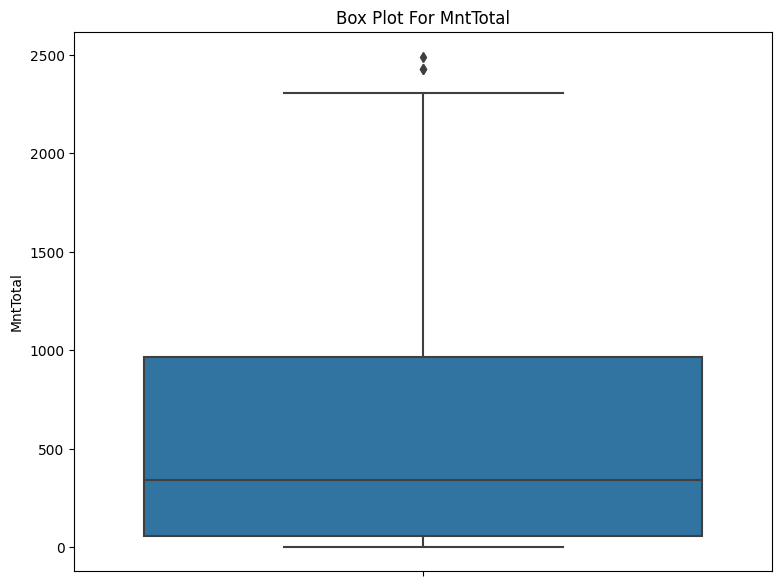

In [10]:
plt.figure(figsize=(9,7))
sns.boxplot(data=data, y='MntTotal')
plt.title('Box Plot For MntTotal')
plt.ylabel('MntTotal')
plt.show()

In [11]:
Q1 = data['MntTotal'].quantile(0.25)
Q3 = data['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['MntTotal'] < lower_bound) | (data['MntTotal'] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [12]:
data = data[(data['MntTotal'] > lower_bound) & (data['MntTotal'] < upper_bound)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


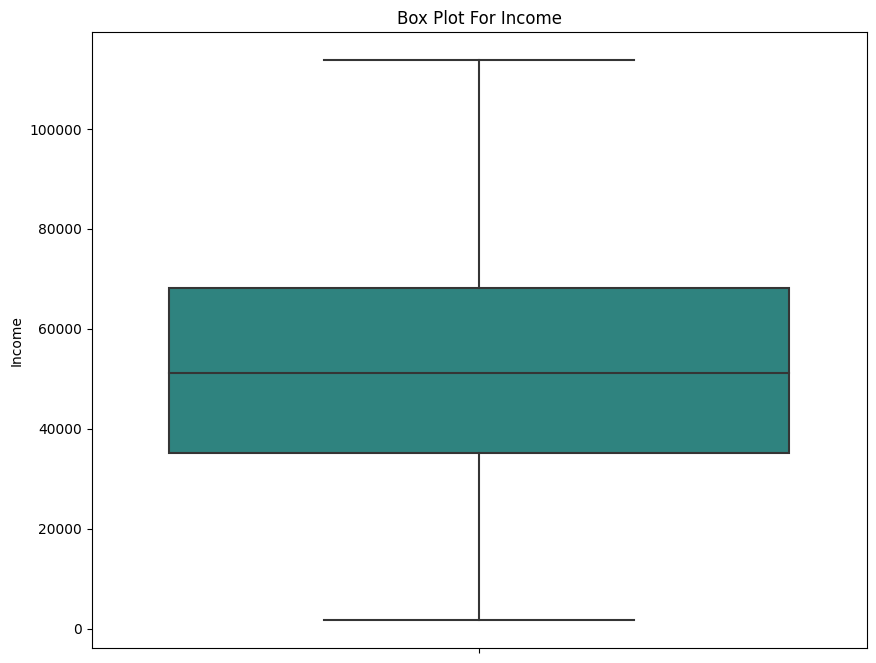

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data, y='Income', palette='viridis')
plt.title('Box Plot For Income')
plt.ylabel('Income')
plt.show()

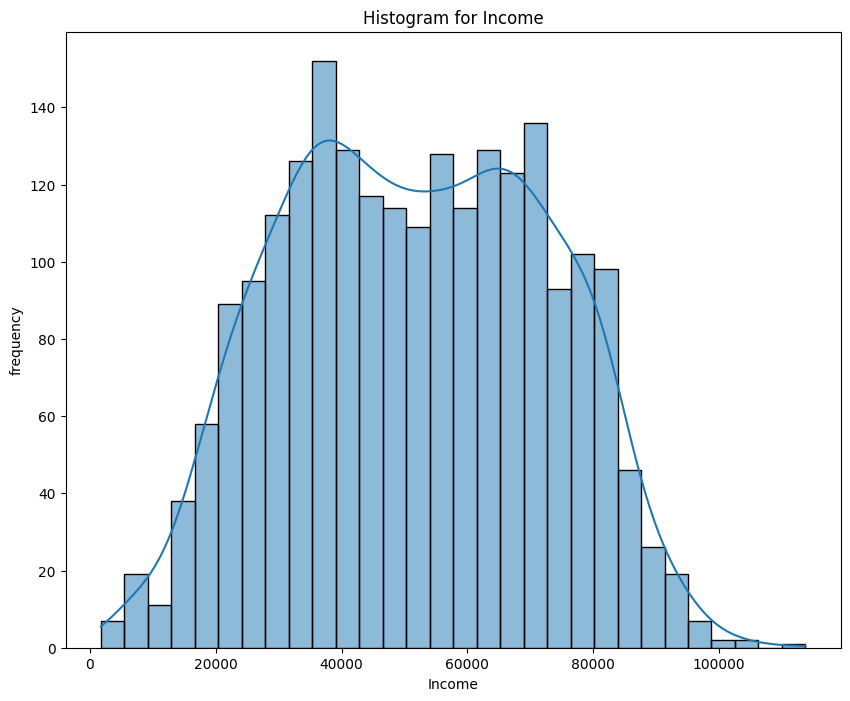

In [14]:
plt.figure(figsize=(10,8))
sns.histplot(data=data, x='Income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('frequency')
plt.show()

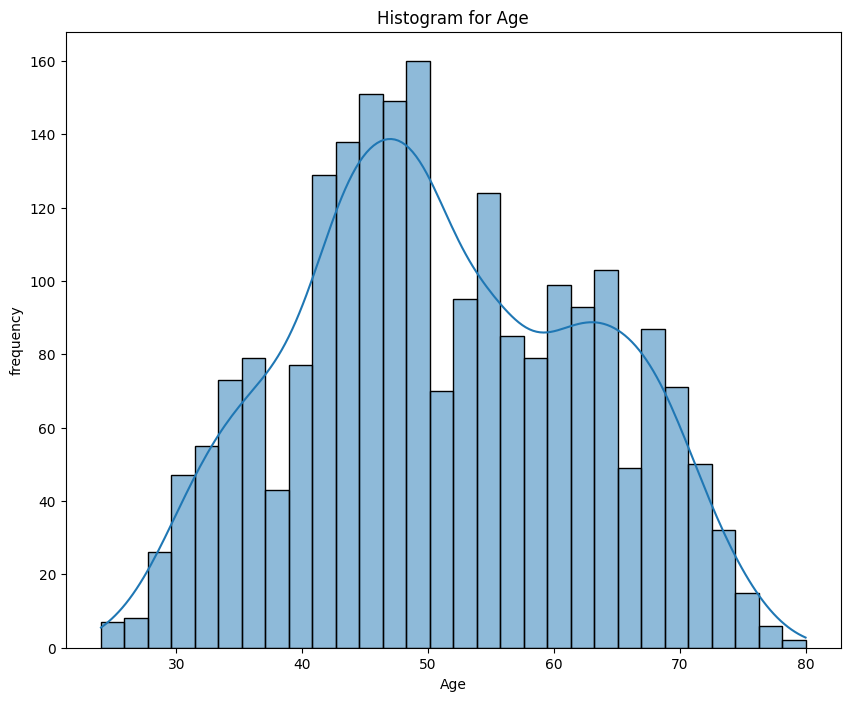

In [15]:
plt.figure(figsize=(10,8))
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

In [16]:
print("Skewness: %f" % data['Age'].skew())
print("kurtosis: %f" % data['Age'].kurt())

Skewness: 0.091227
kurtosis: -0.796125


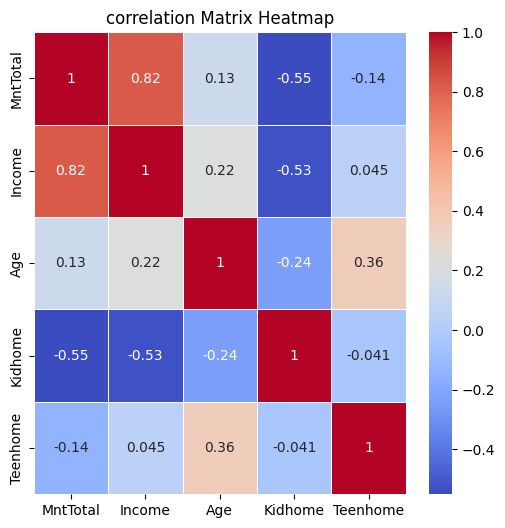

In [17]:
cols_demographics = ['Income','Age']
cols_children = ['Kidhome','Teenhome']
cols_marital = ['marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow']
cols_Mnt = ['MntTotal','MntRegularProds','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
cols_communication = ['Complain','Response','Customer_Days']
cols_campaigns = ['AcceptedCmpOverall','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
cols_source_of_purchase = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
cols_education = ['education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD']

corr_matrix = data[['MntTotal']+cols_demographics+cols_children].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('correlation Matrix Heatmap')
plt.show()

In [18]:
for col in cols_marital:
    correlation,p_value = pointbiserialr(data[col], data['MntTotal'])
    print(f'[correlation:.4f]: Point-Biserial Correlation for [col] with p-value (p_value:.4f)')

[correlation:.4f]: Point-Biserial Correlation for [col] with p-value (p_value:.4f)
[correlation:.4f]: Point-Biserial Correlation for [col] with p-value (p_value:.4f)
[correlation:.4f]: Point-Biserial Correlation for [col] with p-value (p_value:.4f)
[correlation:.4f]: Point-Biserial Correlation for [col] with p-value (p_value:.4f)
[correlation:.4f]: Point-Biserial Correlation for [col] with p-value (p_value:.4f)


In [19]:
for col in cols_marital:
    correlation,p_value = pointbiserialr(data[col], data['MntTotal'])
    print(f'[correlation:.4f]: Point-Biserial Correlation for [col] with p-value (p_value:.4f)')

[correlation:.4f]: Point-Biserial Correlation for [col] with p-value (p_value:.4f)
[correlation:.4f]: Point-Biserial Correlation for [col] with p-value (p_value:.4f)
[correlation:.4f]: Point-Biserial Correlation for [col] with p-value (p_value:.4f)
[correlation:.4f]: Point-Biserial Correlation for [col] with p-value (p_value:.4f)
[correlation:.4f]: Point-Biserial Correlation for [col] with p-value (p_value:.4f)


In [20]:
for col in cols_education:
    correlation, p_value = pointbiserialr(data[col], data['MntTotal'])
    print(f'{col}: Point-Biserial Correlation = {correlation:.4f} with p-value = {p_value:.4f}')


education_2n Cycle: Point-Biserial Correlation = -0.0593 with p-value = 0.0054
education_Basic: Point-Biserial Correlation = -0.1389 with p-value = 0.0000
education_Graduation: Point-Biserial Correlation = 0.0159 with p-value = 0.4551
education_Master: Point-Biserial Correlation = 0.0004 with p-value = 0.9842
education_PhD: Point-Biserial Correlation = 0.0737 with p-value = 0.0005


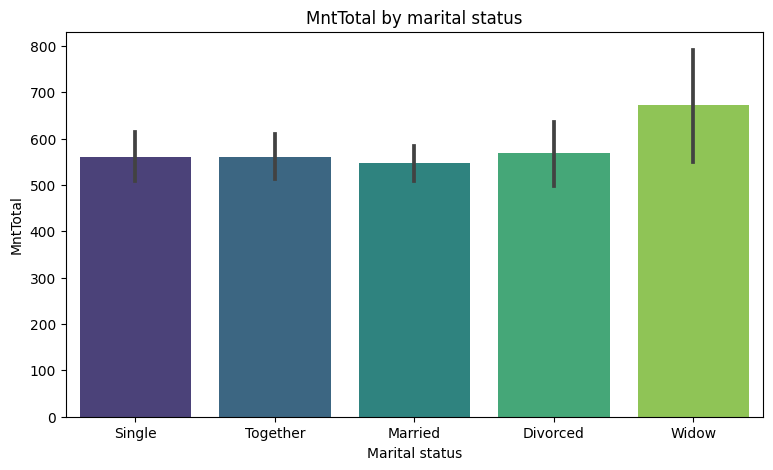

In [21]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    if row['marital_Married'] == 1:
        return 'Married'
    if row['marital_Single'] == 1:
        return 'Single'
    if row['marital_Together'] == 1:
        return 'Together'
    if row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
data['Marital'] = data.apply(get_marital_status, axis=1)

plt.figure(figsize=(9,5))
sns.barplot(x='Marital', y='MntTotal', data=data, palette='viridis')
plt.title('MntTotal by marital status')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')
plt.show()


In [22]:
def get_relationship(row):
    if row['marital_Married'] == 1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0

data['In_relationship'] = data.apply(get_relationship, axis=1)
data.head() 


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,Single,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,Single,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,Together,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,Together,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,Married,1


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.202000e+03,2.202000e+03,2.202000e+03
mean,2.742785e-17,-8.873717e-17,-4.678869e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.410685e+00,-9.724232e-01,-1.348874e+00
25%,-7.926475e-01,-8.815089e-01,-1.348874e+00
50%,-1.508040e-02,-3.806058e-01,7.413589e-01
75%,8.017617e-01,7.024988e-01,7.413589e-01
max,3.006747e+00,3.048788e+00,7.413589e-01


In [24]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

In [25]:
x = data_scaled[cols_for_clustering]
inertia_list = []
for k in range(2,10):
    inertia = KMeans(n_clusters=k, random_state=7).fit(x).inertia_
    inertia_list.append(inertia)

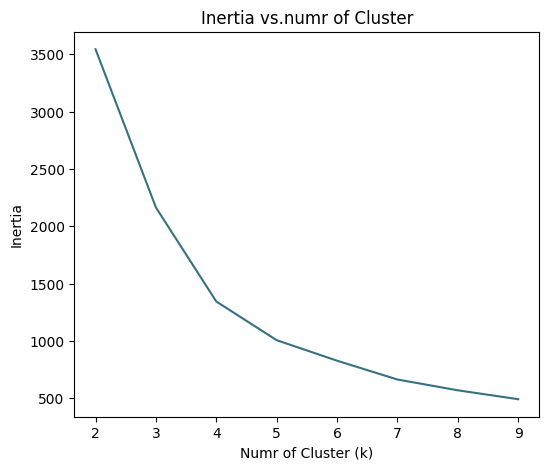

In [26]:
plt.figure(figsize=(6,5))
plt.plot(range(2,10), inertia_list, color=(54 / 253, 113 / 255, 130 / 255))
plt.title("Inertia vs.numr of Cluster")
plt.xlabel('Numr of Cluster (k)')
plt.ylabel('Inertia')
plt.show()

In [27]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for k in range(2,10):
    model = KMeans(n_clusters=k, random_state=7)
    cluster = model.fit_predict(x)
    s_avg = silhouette_score(x, cluster)
    silhouette_list.append(s_avg)

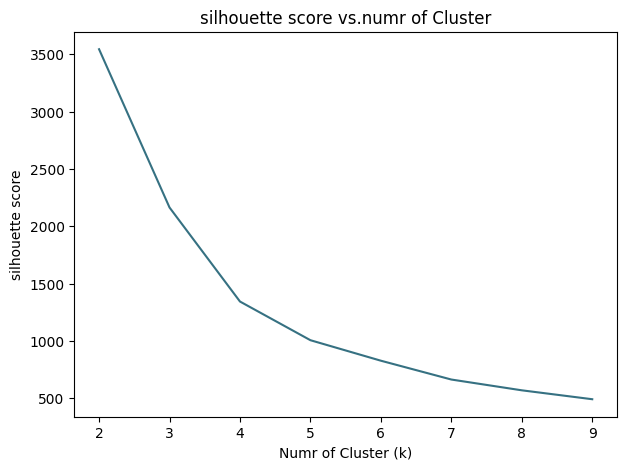

In [28]:
plt.figure(figsize=(7,5))
plt.plot(range(2,10), inertia_list, color=(54 / 253, 113 / 255, 130 / 255))
plt.title("silhouette score vs.numr of Cluster")
plt.xlabel('Numr of Cluster (k)')
plt.ylabel('silhouette score')
plt.show()

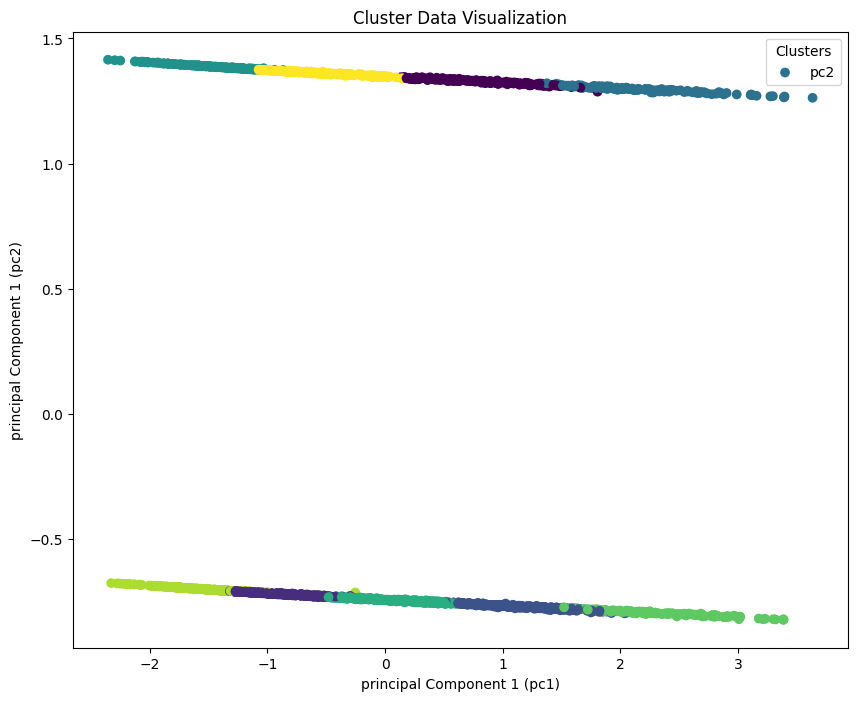

In [29]:
model = KMeans(n_clusters=k, random_state=7)
model.fit(data_scaled[cols_for_clustering])
data_scaled['cluster'] = model.predict(data_scaled[cols_for_clustering])

plt.figure(figsize=(10,8))
plt.scatter(x='pc1', y='pc2', data=data_scaled, c='cluster', cmap='viridis')
plt.title("Cluster Data Visualization")
plt.xlabel('principal Component 1 (pc1)')
plt.ylabel('principal Component 1 (pc2)')
plt.legend(title='Clusters')

In [30]:
data['cluster'] = data_scaled.cluster
data.groupby('cluster')[cols_for_clustering].mean()

,Income,MntTotal,In_relationship
cluster,,,
0,65036.098446,820.502591,0.0
1,40875.185185,131.748677,1.0
2,70464.754098,993.927869,1.0
3,79252.437908,1506.026144,0.0
4,26164.739535,58.311628,0.0
5,56878.067164,457.216418,1.0
6,79321.192090,1656.028249,1.0
7,23283.726962,55.627986,1.0
8,46394.909091,215.145455,0.0


In [31]:
mnt_data = data.groupby('cluster')[cols_Mnt].mean().reset_index()
mnt_data.head()

,cluster,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,820.502591,747.300518,463.041451,45.145078,213.056995,58.870466,40.388601,73.202073
1,1,131.748677,110.034392,73.629630,6.156085,35.476190,10.574074,5.912698,21.714286
2,2,993.927869,923.078689,536.219672,50.498361,279.462295,74.790164,52.957377,70.849180
3,3,1506.026144,1432.830065,763.529412,63.385621,511.758170,96.705882,70.647059,73.196078
4,4,58.311628,42.200000,20.372093,5.297674,19.353488,7.730233,5.558140,16.111628


In [32]:
print(data.columns)

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'Marital', 'In_relationship', 'cluster'],
      dtype='object')


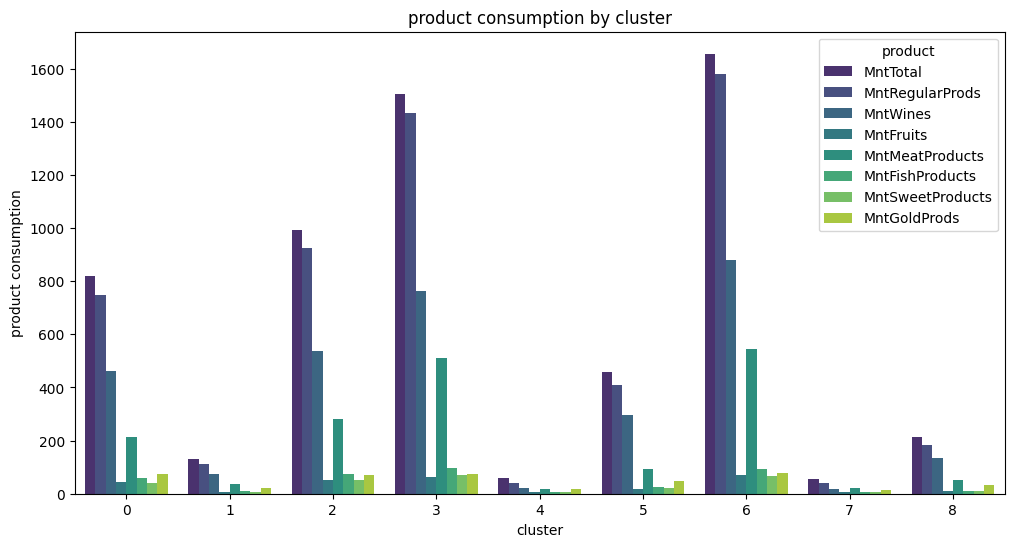

In [33]:
melted_data = pd.melt(mnt_data, id_vars='cluster', var_name='product', value_name='consumption')
plt.figure(figsize=(12,6))
sns.barplot(x='cluster', y='consumption', hue='product', data=melted_data, ci=None, palette='viridis')
plt.title('product consumption by cluster')
plt.xlabel('cluster')
plt.ylabel('product consumption')
plt.xticks(rotation=0)
plt.legend(title='product', loc='upper right')
plt.show()

Text(0, 0.5, 'MntTotal')

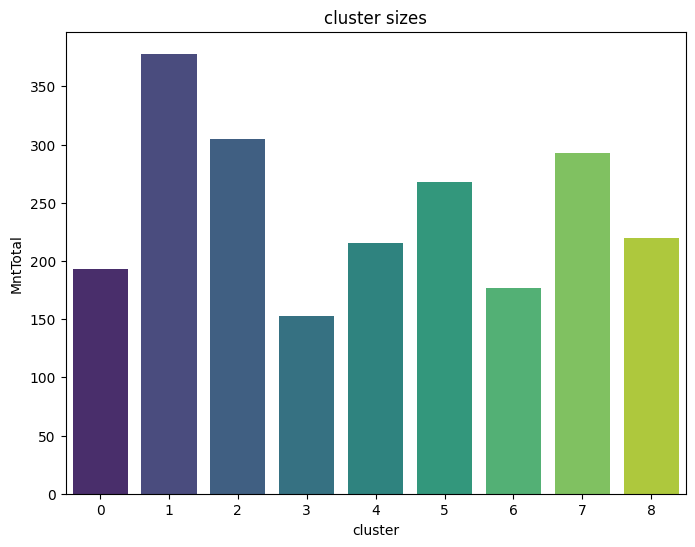

In [34]:
cluster_size = data.groupby('cluster')[['MntTotal']].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='cluster', y='MntTotal', data=cluster_size, palette = 'viridis')
plt.title('cluster sizes')
plt.xlabel('cluster')
plt.ylabel('MntTotal')

In [35]:
total_rows = len(data)
cluster_size['share%'] = round(cluster_size['MntTotal'] / total_rows*100,0)
cluster_size.head()

,cluster,MntTotal,share%
0,0,193,9.0
1,1,378,17.0
2,2,305,14.0
3,3,153,7.0
4,4,215,10.0


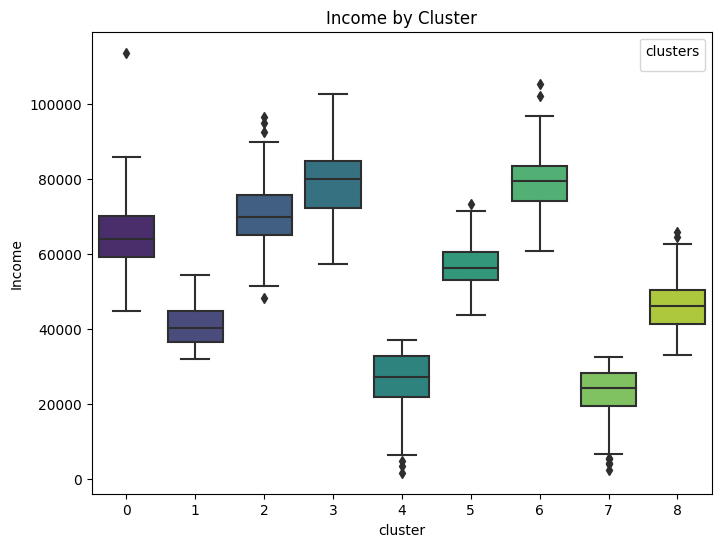

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(x='cluster', y='Income', data=data, palette='viridis')
plt.title('Income by Cluster')
plt.xlabel('cluster')
plt.ylabel('Income')
plt.legend(title='clusters')

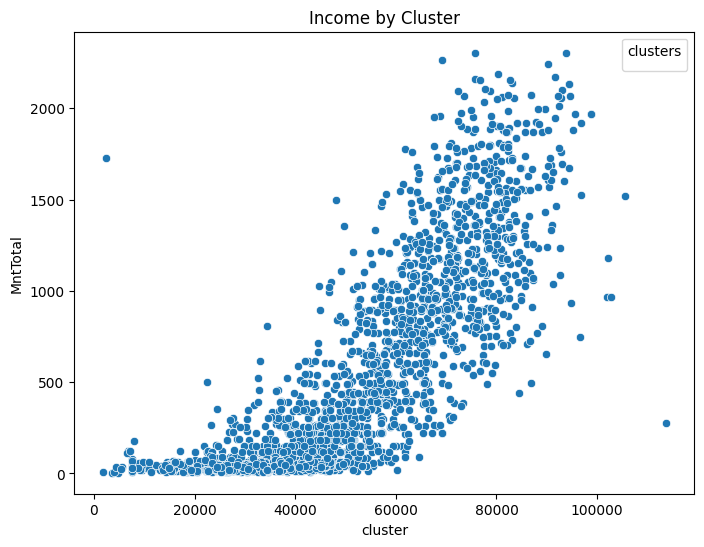

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Income', y='MntTotal', data=data,  palette='viridis')
plt.title('Income by Cluster')
plt.xlabel('cluster')
plt.ylabel('MntTotal')
plt.legend(title='clusters')

Text(0, 0.5, 'In_relationship')

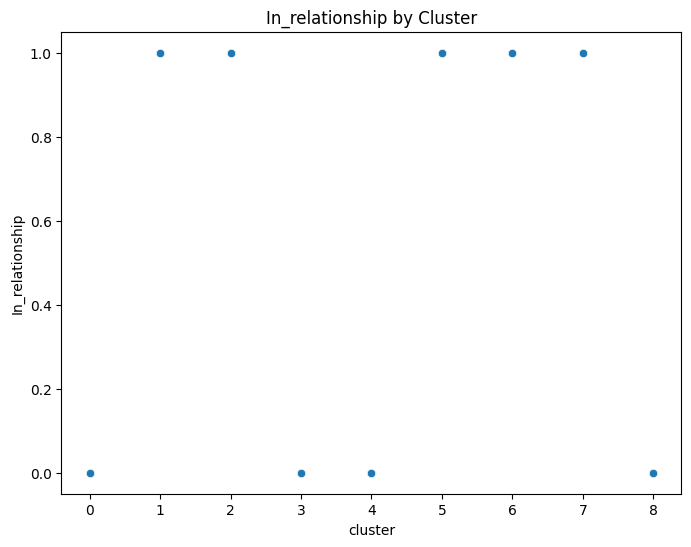

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='cluster', y='In_relationship', data=data,  palette='viridis')
plt.title('In_relationship by Cluster')
plt.xlabel('cluster')
plt.ylabel('In_relationship')
